# ESSAIS DE NAPPE - RESOLUTION DU PROBLEME INVERSE - METHODE DE THEIS

*Préambule: une partie de ce Notebook est issue et modifiée du cours "Transient Groundwater Flow Short Course (Module 3 at UNESCO-IHE, Delft, Netherlands)" construit par Theo Olsthoorn, 08-Jan-2018 et du "Guide des essais de pompage et leurs interprétations" par R.P. Chapuis, 2007*

Les essais de nappe sont réalisés pour obtenir les propriétés hydrodynamiques (transmissivité et coefficient d'emmagasinnement) de l'aquifère. Cette détermination est basée sur l'exploitation des données obtenues lors de la réalisation d'un pompage d'essai sur le site de caractérisation. Cette approche constitue la résolution du problème inverse en hydrogéologie.

La réalisation de ce type de test nécessite a minima d'enregistrer sur un ou plusieurs ouvrages (cf. vidéo ci-après):
- le rabattement au cours du temps (la différence entre la hauteur piézométrique au repos dans l'ouvrage et la durant le pompage)  aux piézomètres d'observation;
- le débit d'exploitation au puits de pompage.

L'interprétation de l'essai de nappe en nappe captive est basée sur l'exploitation de la solution de Theis à l'équation de diffusivité. L'utilisation a minima d'un piézomètre d'observation peut être complétée par d'autres piézomètres afin de compléter l'estimation des paramètres de l'aquifère et avoir une idée notamment de son hétérogénéïté.

A la fin de la partie de terrain, on doit disposer du jeu de données suivant:
- valeur du débit (supposé constant) au puits de pompage;
- valeur du rabattement au cours du temps $ s = f(t)$ à la distance $r$ du piézomètre et éventuellement aux autres piézomètres d'observation.

A l'issue de l'interprétation du test, on obtient les paramètres hydrodynamiques de l'aquifère (transmissivité T et coefficient d'emmagasinnement S) et éventuellement des renseignements complémentaires sur les conditions de gisement de la nappe (effets de limite, drainance,...).

## Equation de diffusivité en nappe captive

$$\frac{\partial^2 h}{\partial r^2} + \frac{1}{r}\frac{\partial h}{\partial r} = \frac{S}{Kb} \times \frac{\partial h}{\partial t}$$

## Solution de Theis

### Hypothèses:
- Aquifère reposant sur un couche imperméable
- Formations géologiques homogènes, isotropes, horizontales et d'extension horizontale infinie
- Surface piézométrique initialement horizontale
- Loi de Darcy valide
- Puits parfait et de diamètre négligeable
- Eau provient uniquement de la décompression de l'aquifère

### Equation de Theis
En réalisation le changement de variable suivant:
$$
	u = \frac{r^2S}{4Kbt}
$$

La résolution de l'équation de diffusivité pour les hypothèses (conditions limites) précédentes amène la solution de Theis

$$
    s = \frac{Q}{4 \pi T} \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

### Fonction de Theis
Cette résolution introduit la fonction de Theis  $W(u)$ définie par analogie à l'équation précédente:

$$
	W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

La fonction $W(u)$ est connue également en mathématiques sous le terme de fonction Exponentielle Intégrale $E_i$:

$$
	E_i = \int_{-\infty}^{u} {\frac{e^{y}}{y}} \mathrm{d}y
$$
Une fonction alternative $E_1$ peut être définie, de la même famille que la fonction exponentielle intégrale $E_i$ telle que:

$$
    E_1(x) = -E_i(-x) = \int_{x}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = W(u)
$$


## 1. Solution de Theis: fonctionnement élémentaire

### Question 1.a
A partir du tableau de valeurs de la fonction exponentielle intégrale de Theis et de l'abaque correspondante ($W(u) = f(\frac{1}{u})$ ou $W(u) = f(\frac{1}{u})$), se familiariser avec la lecture des variables $u$ et $W(u)$.

<figure>
  <IMG SRC="ENS2_Hydrodyn_8.png" WIDTH=800 ALIGN="left">
</figure>

### La fonction de Theis dans un environnement "scientifique", comment obtenir les valeurs utiles à l'hydrogéologue?

#### Expression de la fonction de Theis à partir d'un développement en série de Taylor

La fonction de Theis peut également être exprimée selon un développement en série de Taylor. On obtient une formulation en série infinie de puissance:

$$
    W(u) = -\gamma - ln(u) - \sum_{n=1}^{\infty} {\frac{(-1)^n u^n}{n(n)!}}
$$

soit sous la forme développée

$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!} + - \frac{u^5}{5.5!} - \cdots
$$

avec $\gamma = 0.5773$ (nombre d'Euler).

Cette expression corresponds à une série infinie convergente. $W(u)$ peut être approché en tronquant la série infinie après un nombre de terme suffisant

Par exemple, en tronquant la série au 4ème terme:
$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!}
$$


In [ ]:
# Développement de Taylor
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

U = 4.0 * 10** -np.arange(11.)   # generates values 4, 4e-1, 4e-2 .. 4e-10
print("{:>10s} {:>10s} {:>10s}".format('u  / ', 'W(u) série tronquée  /', 'W(u) Theis'))
for u in U:
    W = sp.exp1(u)
    w = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
    print("{:.3e} {:.3e} {:.3e}".format(u, w, W))

     u  /  W(u) série tronquée  / W(u) Theis
4.000e+00 -1.075e+00 3.779e-03
4.000e-01 7.024e-01 7.024e-01
4.000e-02 2.681e+00 2.681e+00
4.000e-03 4.948e+00 4.948e+00
4.000e-04 7.247e+00 7.247e+00
4.000e-05 9.549e+00 9.549e+00
4.000e-06 1.185e+01 1.185e+01
4.000e-07 1.415e+01 1.415e+01
4.000e-08 1.646e+01 1.646e+01
4.000e-09 1.876e+01 1.876e+01
4.000e-10 2.106e+01 2.106e+01


#### Calcul de W(u) à partir des fonctionnalités intégrées de Python

La fonction exponetielle intégrale est implémentée dans la bibliothèque "Scipy.Special" sous la forme "exp1".
On peut directement calculer la valeur $W(u$) telle que:
$$
    W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = exp1(u)
$$  

In [ ]:
# fonction intégrée Python
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

u = 5.24e-3  # choisir une valeur de u
print('exp1(u)    =', sp.exp1(u),', module scipy.special')

exp1(u)    = 4.679451259333019 , module scipy.special


#### Calcul de W(u) à partir d'une intégration numérique

Comme toute fonction mathématique continue et dérivable, la fonction de Theis peut faire l'objet d'une intégration numérique afin d'estimer la valeur de $W(u)$ pour toute valeur de borne particulière $u$.

Afin de réaliser cette intégration, il est nécessaire de réécrire la forme continue de la fonction de Theis à l'aide d'une formulation discontinue:
$$
    W(u) = \intop_u^{-\infty} \frac {e^{-y}} y dy \approx \sum_0^N \frac {e^{-y_i}} {y_i} \Delta y_i
$$

où $y_0 = u_0$ et $N$ est un entier suffisamment grand.

Le package numpy permet de réaliser une intégration numérique, en définissant préalablement la fonction à intégrer comme une fonction Python.

In [ ]:
# intégration numérique

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt


def Wint(u):
    '''Renvoie la valeur de la fonction de Theis obtenue par intégration numérique'''
    LOG10INF = 2 # sufficient as exp(-100) is in the order of 1e-50
    y = np.logspace(np.log10(u), LOG10INF, num=1000)
    arg = np.exp(-y) / y
    dy = np.diff(y)
    w = np.sum(0.5 * (arg[:-1] + arg[1:]) * dy)
    return w

u = 5.24e-3  # choisir une valeur de u
print('Wint(u)    =', Wint(u),', obtenu par intégration numérique')

Wint(u)    = 4.679551433747345 , obtenu par intégration numérique


#### Représentation graphique de la fonction W(u)

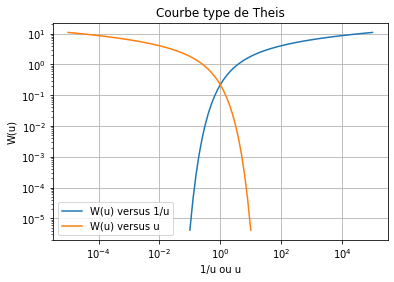

In [ ]:
# Illustration
# Representation graphique de la fonction de Theis

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# calcul de u avec echantillonnage log10
u = np.logspace(-5, 1, 61)

# paramétrage de la figure W(u)
plt.title('Courbe type de Theis')
plt.xlabel('1/u ou u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(1/u, sp.exp1(u),label='W(u) versus 1/u') # plot well function versus 1/u
plt.plot(u, sp.exp1(u),label='W(u) versus u') # plot well function versus u
plt.legend(loc='best')

plt.show()

## 1. EXERCICE 1 SUJET 2025

cf. énoncé MOODLE

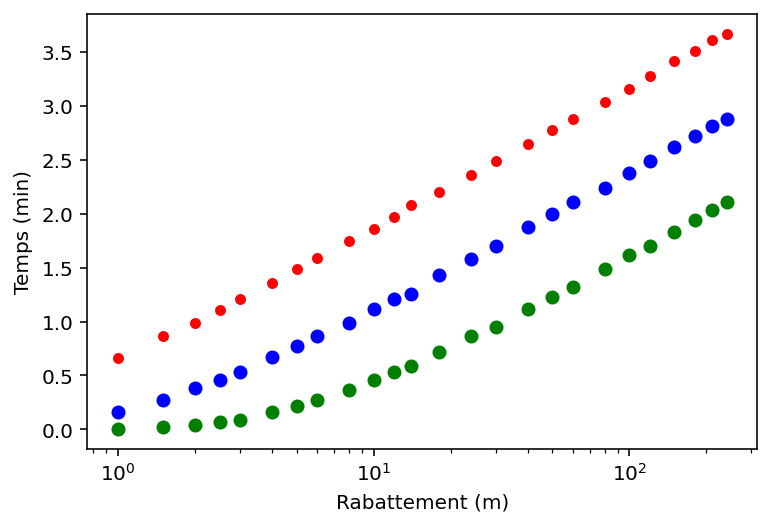

In [ ]:

import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt
#bibliotheque d'optimisation (on a besoin que de la fonction curve_fit)
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'

##############################################
# ESSAI NAPPE TD EXO 1
##############################################
#lecture donnees test sur serveur GITHUB
# si ontravaille en local, changer le chemin d'acces au fichier

df_file = pd.read_table('https://raw.githubusercontent.com/larroque852/NB_ENS2_OPT_HYDRODYN/main/ENS2_HYD_TD_EXO_CJ.csv',skiprows=1,
                        delimiter=',', names = ['t_min','s1_m','s2_m','s3_m'])

# une représentation graphique brute

ax=df_file.plot(kind='scatter',x='t_min',y='s1_m', logx = True,color='red')
ax.scatter(df_file['t_min'],df_file['s2_m'], color='blue')
ax.scatter(df_file['t_min'],df_file['s3_m'], color='green')
ax.set_xlabel("Rabattement (m)")
ax.set_ylabel("Temps (min)")
plt.show()


# définition du modèle de Theis
# on doit programmer une fonction qui sera de la forme: s = f_theis(t, T, S)
# avec T et S les parametres hydrodynamiques que l'on cherche



#variables du test



#affectation des variables mesurées (t, s_mes) en enlevant si nécessaire des données
#jugees non necessaires


#Utilisation de la fonction d'optimisation curve_fit() et f_theis
#pour determiner T et S

best_vals, covar= curve_fit(theis, t_mes, s_mes, Tini, Sini)

#resultats

Tcalc = best_vals[0]
Scalc = best_vals[1]
print('Resultats ajustement:')
print('T (r = 61 m) = {:.1e} m2/min'.format(Tcalc))
print('S (r = 61 m) = {:.1e} (-)'.format(Scalc))





## Tutorial inside: ajustement d'un modèle à des données observées

L'ajustement d'un modèle est un problème d'optimisation qui permet à partir d'une fonction paramètrique connue (*le modèle*) de déterminer ses paramètres afin de restituer au mieux un jeu de données (*observations*).
On peut représenter cette méthode simplement en 2 dimensions, avec un domaine défini par des *entrées* et des *sorties*. Les abscisses sont les données indépendanes d'entrée de la fonction modèle. Les ordonnées représentent les données dépendantes de sortie de la fonction modèle.
On a collecté des données expérimentales/mesurées d'entrée/sortie d'un système que l'on suspece fonctionner selon le modèle pré-identifié.
L'ajustement d'un modèle consiste à choisir un type de modèle, puis estimer les paramètres adaptés de manière à restituer au mieux les valeurs observées.

Le package SciPy dans sa librairie d'optimisation '*optimize*' procure une fonction *Curve_fit* qui permet l'ajustement d'un modèle défini par une fonction paramétrique quelconque à des données expérimentales ou mesurées, et d'estimer les paramètres optimaux minimisant l'écart entre valeurs modélisées et valeurs mesurées.

La procédure est la suivante:
- mise en forme des données expérimentales/observées en identifiant variables dépendantes et indépendantes
- identification du modèle théorique susceptible de resituer le comportement des données expérimentale/observées
- programmation d'une fonction '*modèle*' comprenant les paramètres à ajuster
- estimation des paramètres optimums
- évaluation de la qualité de l'ajustement et des incertitudes associées (non abordé ici)

Afin de se familiariser avec cette démarche à l'aide des outils disponibles dans Python, on se propose de réaliser un exercice.
Cet exercice est directement adapté du tutorial "*Curve fitting with Python*" disponible à l'adresse suivante:

https://machinelearningmastery.com/curve-fitting-with-python/

L'objectif est de se familiariser avec les commandes principales permettant de résoudre ce type de problématique.

Les différents points sont abordés:
- chargement et représentation graphique des données observées
- choix d'un modèle linéaire et ajustement des paramètres optimums
- choix d'un modèle polynomial et ajustement des paramètres optimums

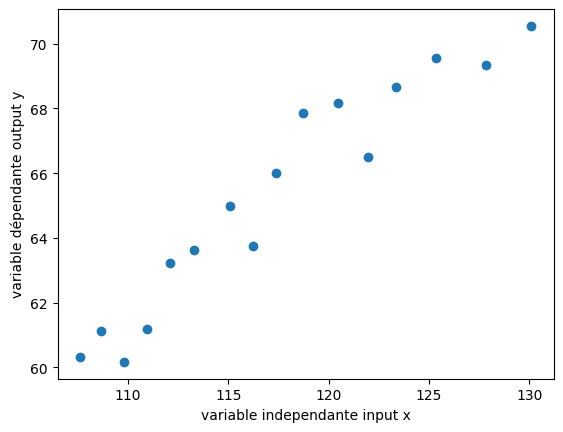

In [9]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#---------------------------------------------------------------------
# chargement et représentation graphique des données observées
#---------------------------------------------------------------------

# plot "Population" vs "Employed"
import pandas as pd
from matplotlib import pyplot
# load the dataset
#data = np.genfromtxt('data_tuto.csv',delimiter=',')

data = pd.read_table('https://raw.githubusercontent.com/larroque852/NB_ENS2_OPT_HYDRODYN/main/data_tuto.csv',
                        delimiter=',',names = ['x','y'])
# choose the input and output variables
x, y = data['x'], data['y']
# plot input vs output
pyplot.scatter(data['x'],data['y'])
plt.xlabel('variable independante input x')
plt.ylabel('variable dépendante output y')
pyplot.show()



y = 0.48488 * x + 8.38067


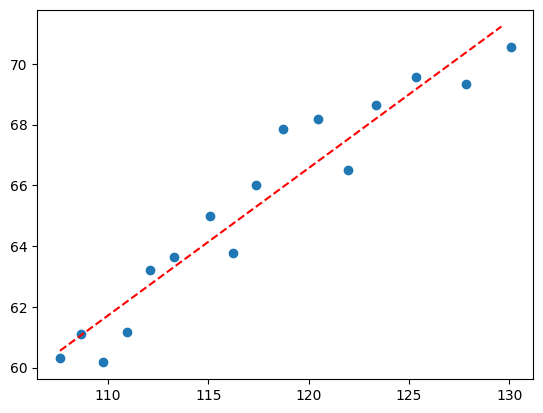

In [10]:
#---------------------------------------------------------------------
# identification du modèle théorique susceptible de restituer le comportement des données expérimentale/observées
# modèle LINEAIRE
#---------------------------------------------------------------------

# define the true objective function ("modèle")
def objective(x, a, b):
	return a * x + b

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()



y = -0.01170 * x^2 + 3.25444 * x + -155.02845


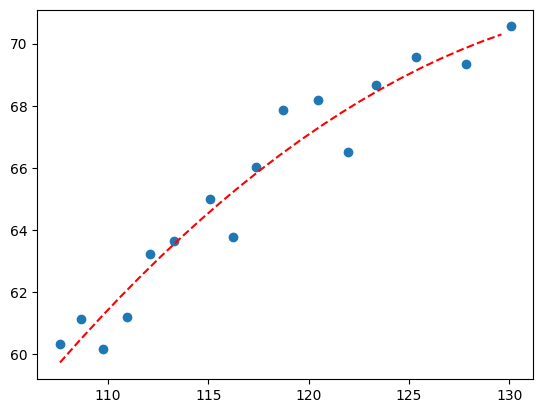

In [11]:
#---------------------------------------------------------------------
# identification du modèle théorique susceptible de restituer le comportement des données expérimentale/observées
# modèle POLYNOMIAL
#---------------------------------------------------------------------

# define the true objective function ("modèle")
def objective(x, a, b, c):
	return a * x ** 2 + b * x + c

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()



## Bibliographie

Kruseman, G.P. & N.D. de Ridder (1994) Pumping test analysis. Disponible sur Internet.